In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

import matplotlib.pyplot as plt

from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño
from sklearn.preprocessing import PolynomialFeatures    # Herramientas de polinomios
from sklearn.preprocessing import MinMaxScaler    # Herramientas de polinomios

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from formulaic import model_matrix
from formulaic import Formula

# Paquetes para clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Utilizamos NearestNeighbors para obtener los vecinos más cercanos
from sklearn.neighbors import NearestNeighbors

# Cargamos el comando mode
import statistics
from statistics import mode

# Utilizamos estos paquetes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

**Ej1**: Como es manual lo dejo para otro momento (k-medias a mano no entra en el parcial)

**Ej2**: Considere los datasetets p7-data1.csv y p7-data2.csv de datos artificialmente generados.

**(a)** Abra cada dataset en Python y genere un diagrama de dispersión (scatter plot) para cada 
uno.

In [15]:
data1 = pd.read_csv("p7-data1.csv")
data2 = pd.read_csv("p7-data2.csv")

In [16]:
data1.head()

,x,y
0,1.765881,-8.314427
1,6.483456,-3.332369
2,-8.480197,0.067655
3,4.706642,7.349470
4,4.502446,-8.135970


In [17]:
data2.head()

,x,y
0,9.319049,6.406236
1,2.752240,5.609928
2,8.469910,17.636237
3,8.701497,3.632456
4,7.858546,10.899268


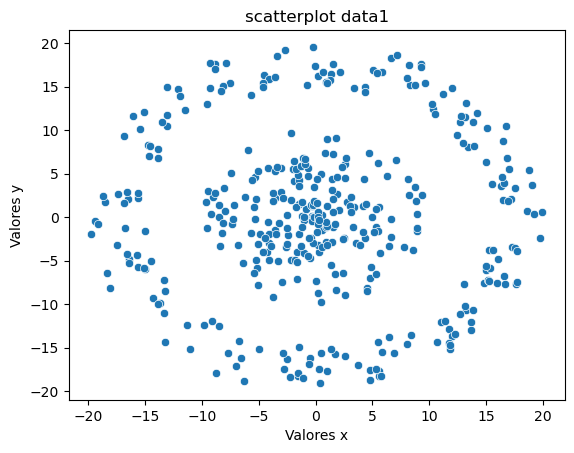

In [18]:
sns.scatterplot(data=data1, x="x", y="y")
plt.xlabel("Valores x")
plt.ylabel("Valores y")
plt.title("scatterplot data1")
plt.show()

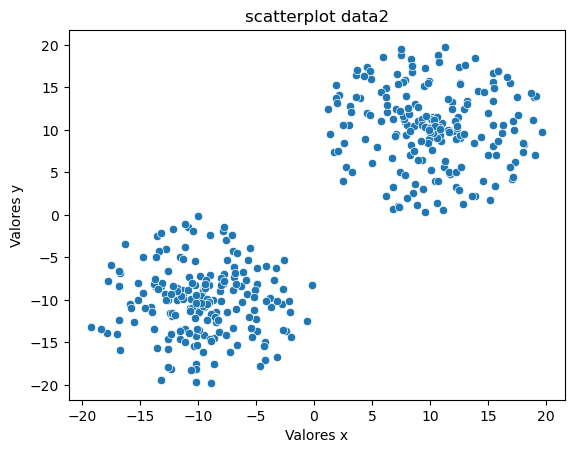

In [19]:
sns.scatterplot(data=data2, x="x", y="y")
plt.xlabel("Valores x")
plt.ylabel("Valores y")
plt.title("scatterplot data2")
plt.show()

**(b)** Analizando los gráficos “a mano” considere cuántos clusters están presentes.

En ambos datasets podríamos considerar que hay 2 clusters presentes

**(c)** Pruebe ejecutar el comando KMeans con la cantidad de clusters que detectó. Analizar el 
comportamiento del procedimiento en cada caso.

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


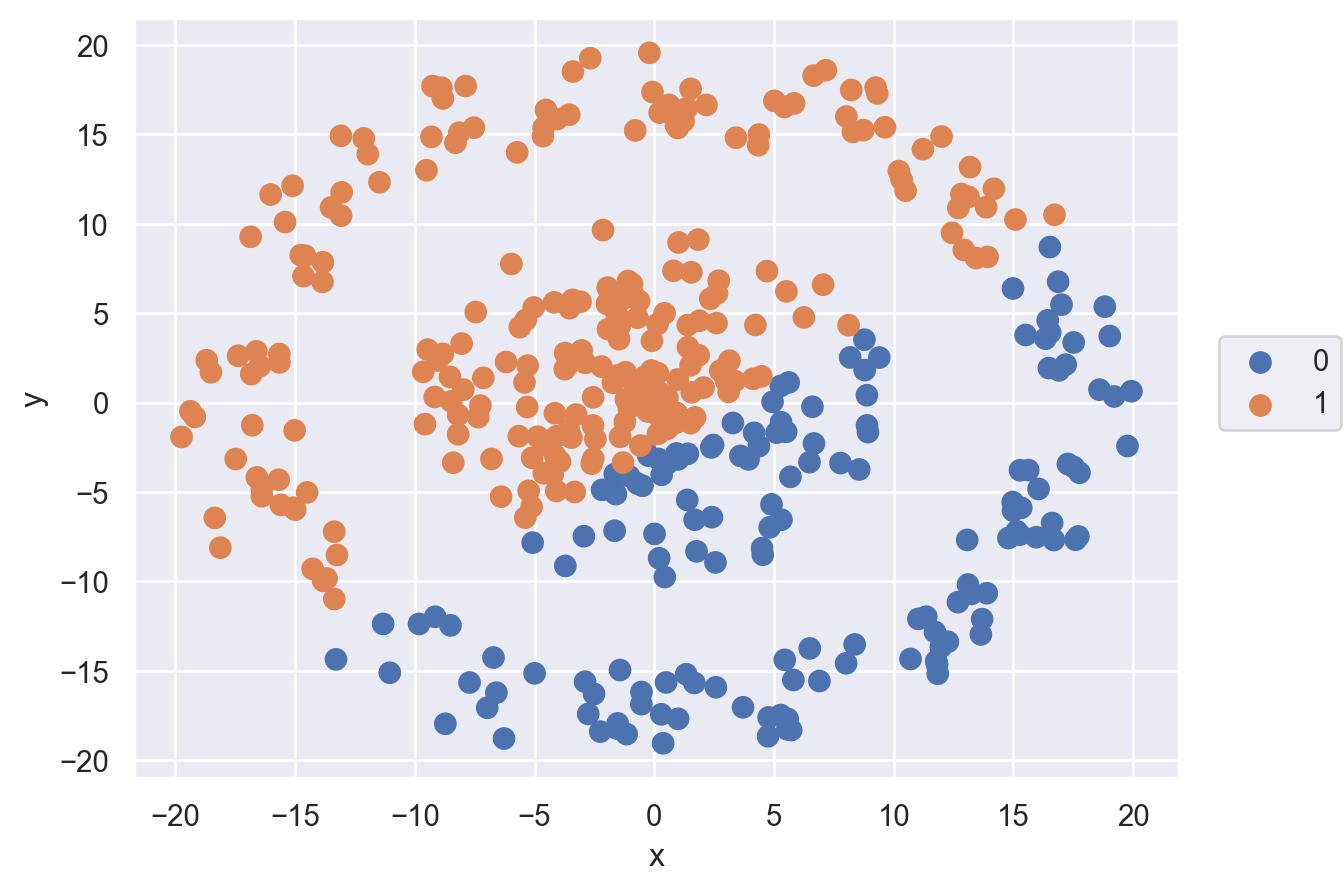

In [31]:
kmeans = KMeans(n_clusters=2)
etiquetas1 = kmeans.fit_predict(data1)
(
    so.Plot(data = data1, x = "x", y = "y", color = etiquetas1.astype(str))
    .add(so.Dot(pointsize = 8))
)

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


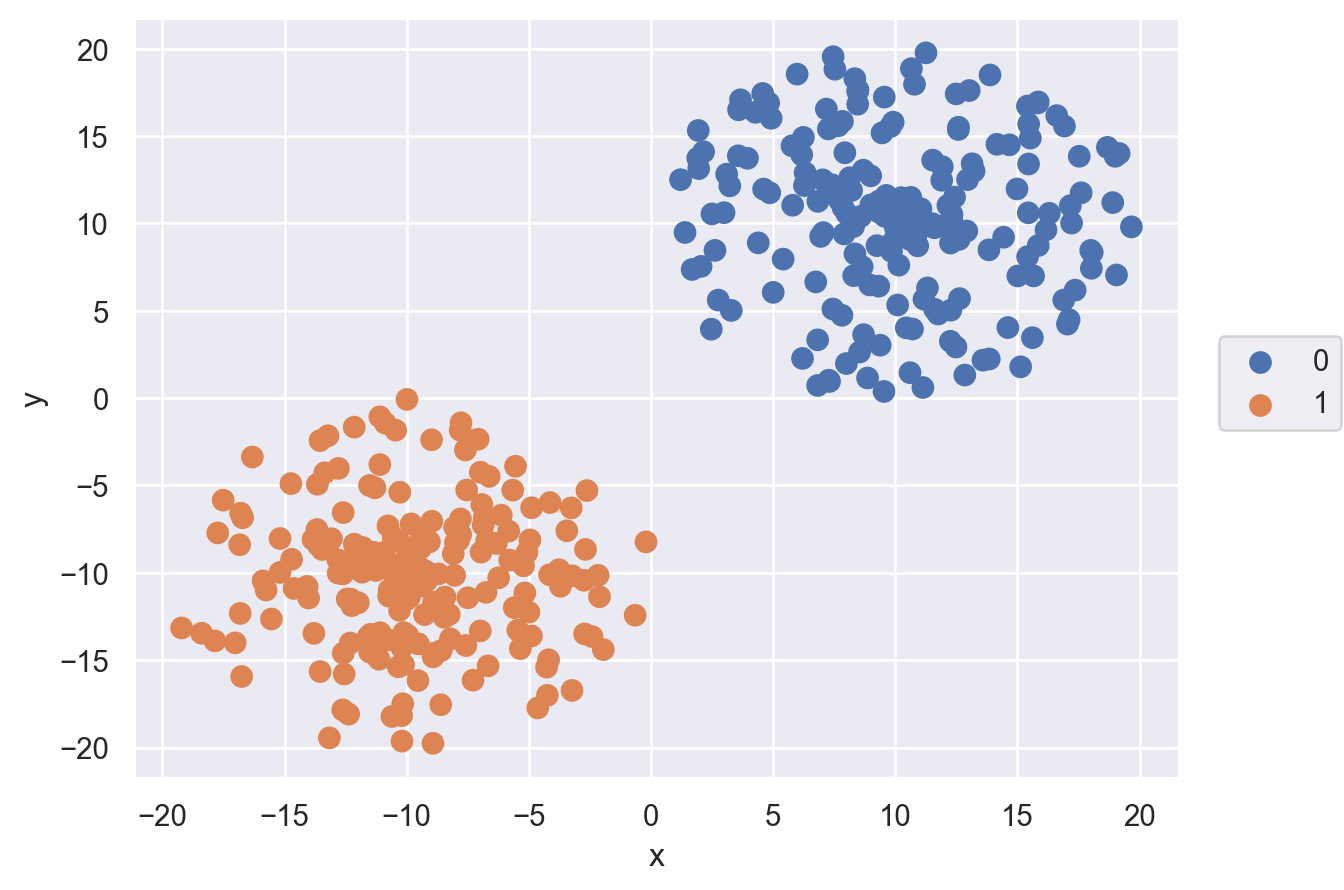

In [32]:
etiquetas2 = kmeans.fit_predict(data2)
(
    so.Plot(data = data2, x = "x", y = "y", color = etiquetas2.astype(str))
    .add(so.Dot(pointsize = 8))
)

**Ej3**

In [63]:
# (a) Cargar el archivo p7-iris.txt
iris = pd.read_csv('p7-iris.txt', sep='\t')
iris

,LongSepalo,AnchoSepalo,LongPetalo,AnchoPetalo
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


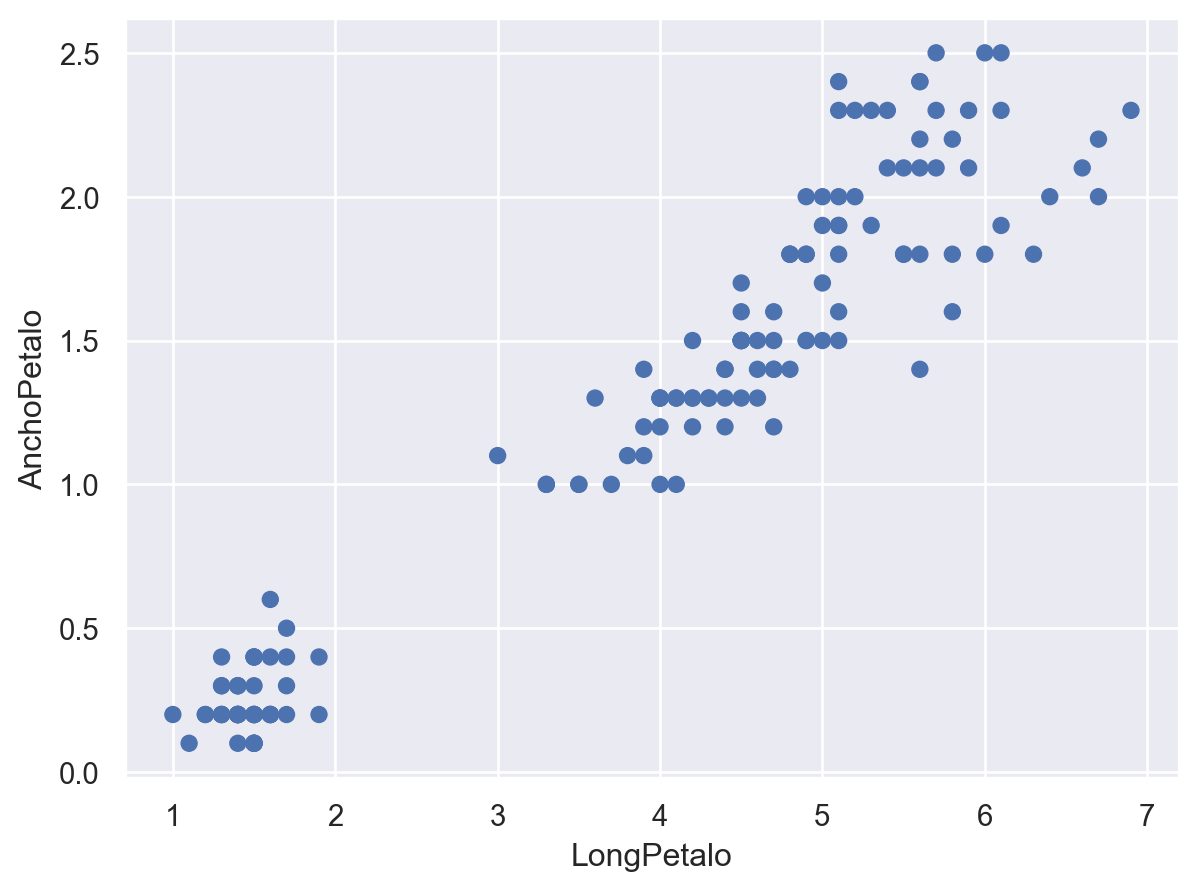

In [56]:
# (b) Grafique en un diagrama de dispersión la longitud del pétalo vs el ancho del pétalo.
(
    so.Plot(data = iris, x = "LongPetalo", y = "AnchoPetalo")
    .add(so.Dot())
)

In [57]:
# (c) Efectúe un clustering k-medias con el comando KMeans de los datos basados en las cuatro columnas de datos, considere k = 3 clusters.
kmeans = KMeans(n_clusters=3)
etiquetas = kmeans.fit_predict(iris)

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


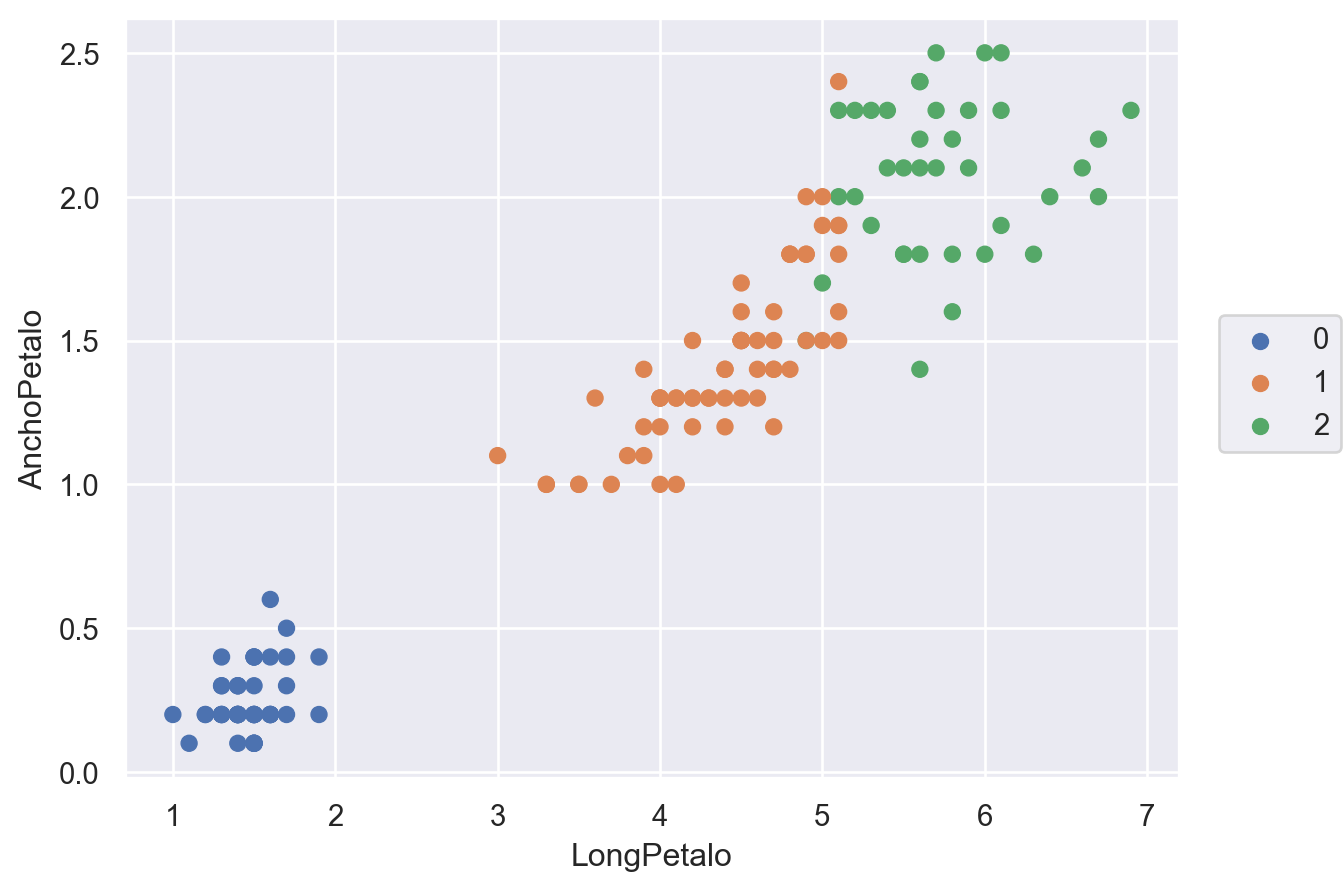

In [58]:
# (d) Repita el inciso b) coloreando en función del índice de cluster obtenido.
(
    so.Plot(data = iris, x = "LongPetalo", y = "AnchoPetalo", color = etiquetas.astype(str))
    .add(so.Dot())
)

In [60]:
import warnings
warnings.filterwarnings('ignore')

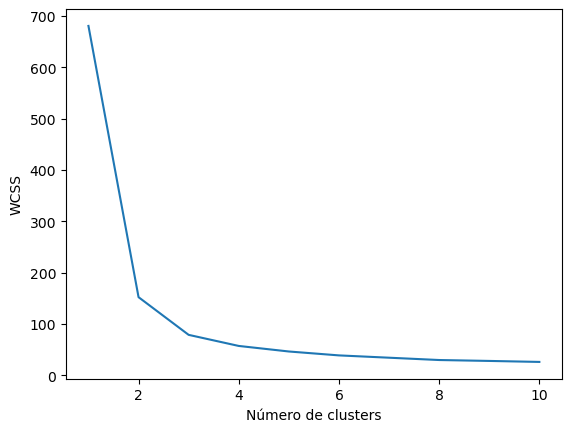

In [64]:
# (e)
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    cluster = kmeans.fit_predict(iris)
    wcss.append(kmeans.inertia_)
    
# Graficamos los resultados en un gráfico, y observamos en qué valor de k se da el "codo"
plt.plot(range(1, 11), wcss)

plt.xlabel('Número de clusters')
plt.ylabel('WCSS') # within cluster sum of squares (suma de cuadrados en cada cluster)
plt.show()

**(f) (SALTEO)** Repita el ensayo para distintos valores de k, entre 1 y 10, graficando el W CSS para cada
valor de k. Analizar el mejor valor de k posible teniendo en cuenta un compromiso entre
“complejidad” (es decir, cantidad de clusters) y nivel de error (es decir, el WCSS).

**Ej4**

In [172]:
# (a)
datos = pd.read_csv("p7-dataSinEscalar.csv")
datos

,x,y
0,0.002501,6488.267030
1,-0.026980,2521.947220
2,-0.029001,3068.772910
3,0.007030,4314.274820
4,-0.025356,2384.499450
...,...,...
395,0.002410,4810.405110
396,0.003557,4712.744040
397,0.012008,601.671730
398,0.000908,2873.527460


In [71]:
datos.columns

Index(['x', ' y'], dtype='object')

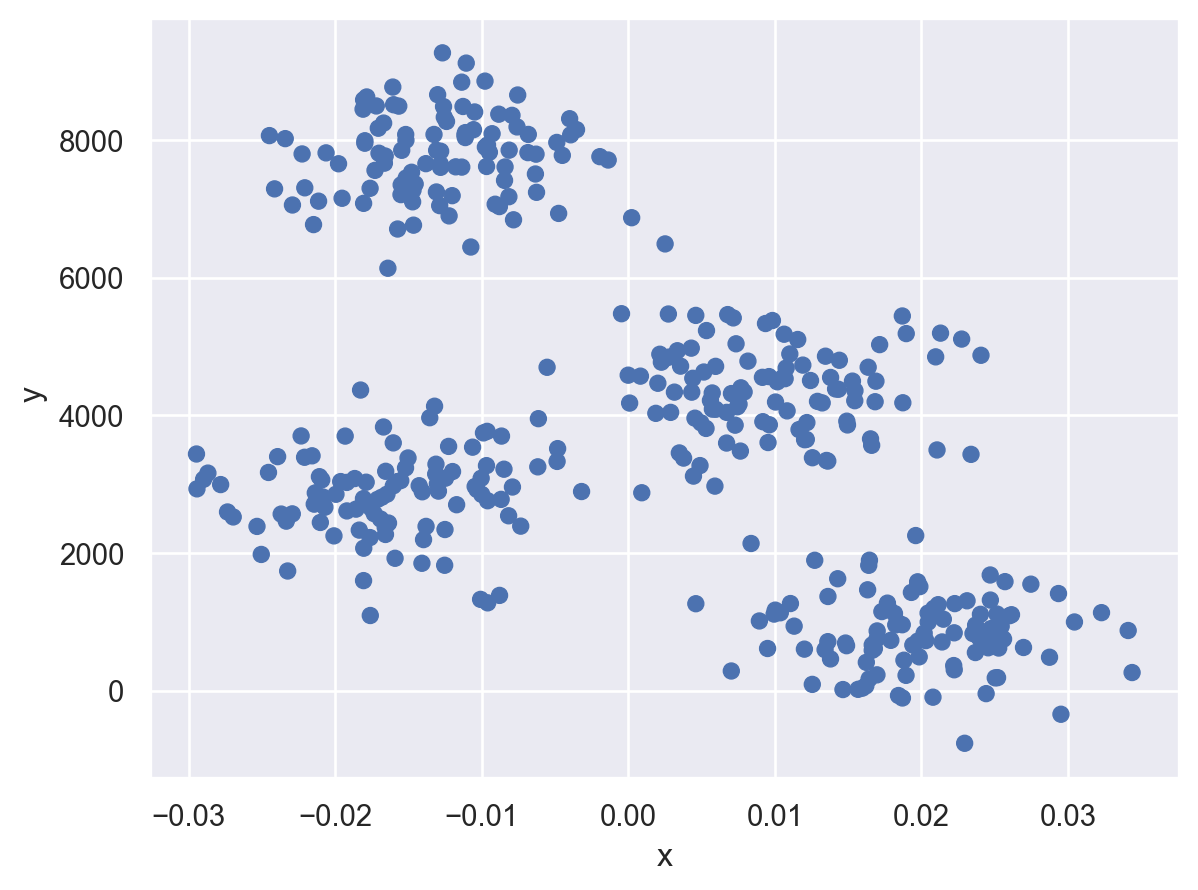

In [72]:
(
    so.Plot(data=datos, x="x", y=" y")
    .add(so.Dot())
)

In [73]:
# (b) Imagino que habrán 4 clusters

In [80]:
# (c)
kmeans = KMeans(n_clusters=4)
etiquetas = kmeans.fit_predict(datos)

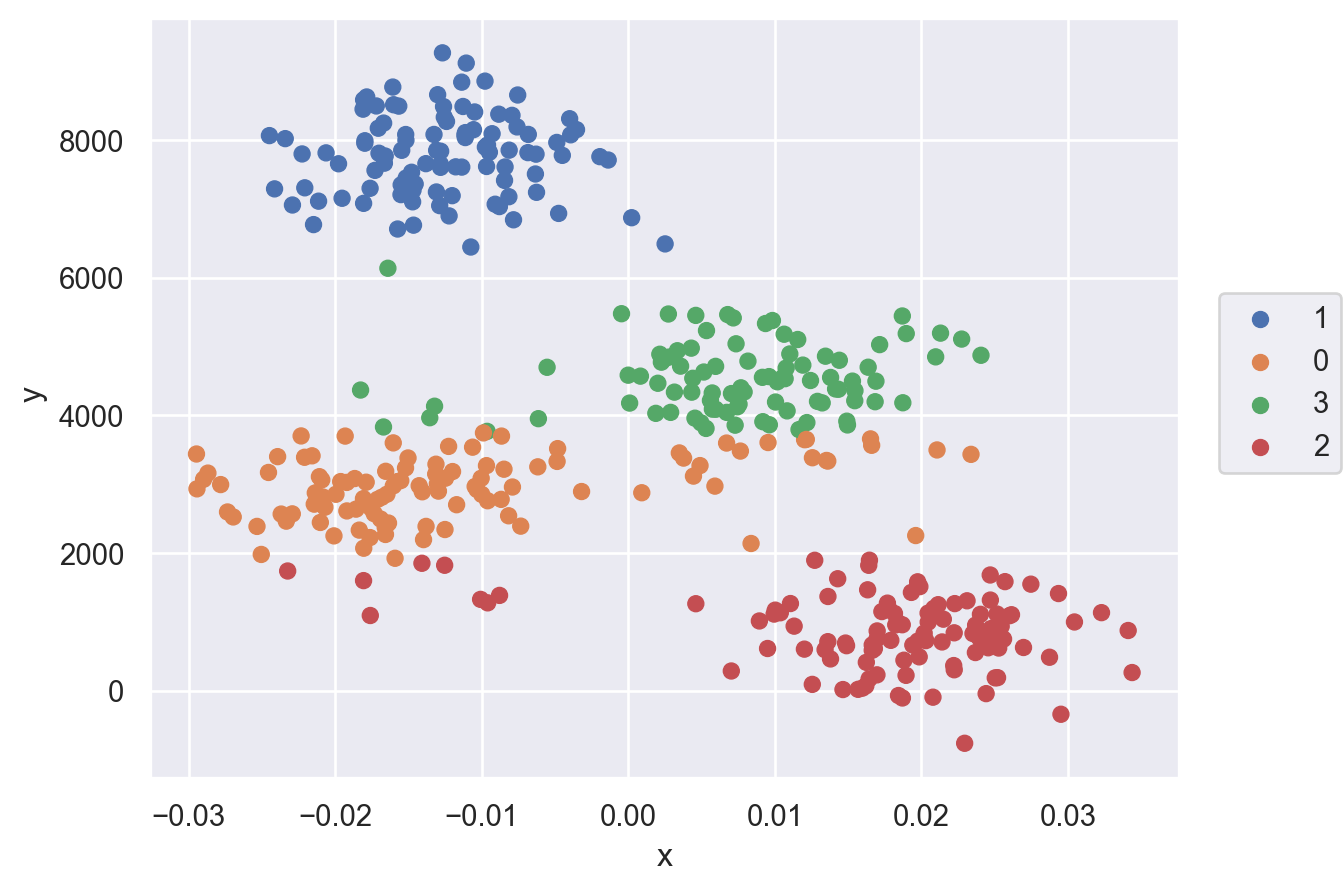

In [81]:
(
    so.Plot(data = datos, x = "x", y = " y", color = etiquetas.astype(str))
    .add(so.Dot())
)

**Uno de los problemas que tenemos es que el método de k-medias es muy sensible a las diferencias de escala entre las dimensiones. Una forma de corregir eso es re-escalando las variables de forma tal que todas se muevan en el mismo rango.**

In [226]:
scaler = MinMaxScaler().set_output(transform="pandas")
data = scaler.fit_transform(datos)

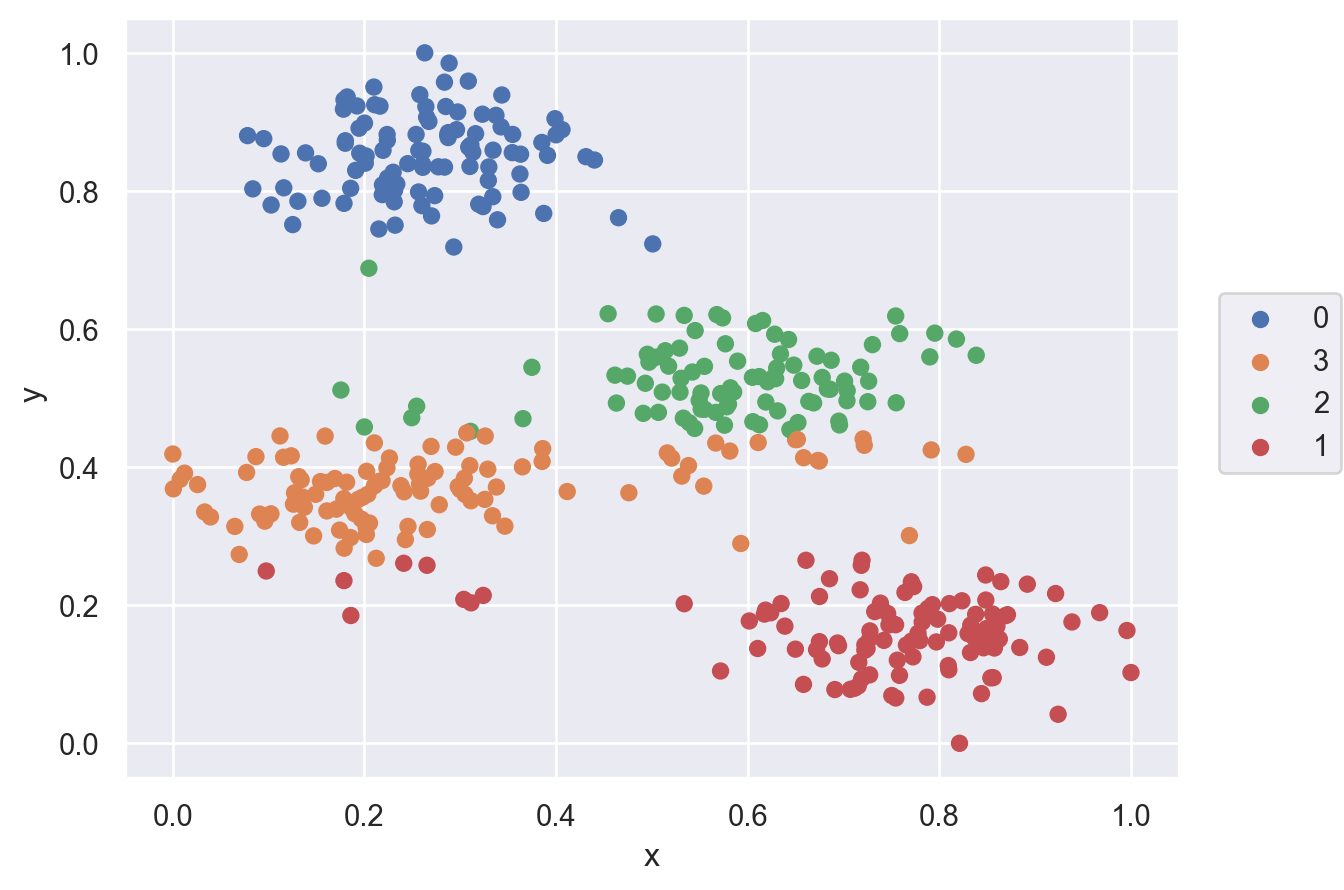

In [227]:
kmeans = KMeans(n_clusters=4, random_state=42)
etiquetas = kmeans.fit_predict(datos[["x", " y"]])
(
    so.Plot(data = data, x="x", y=" y", color = etiquetas.astype(str))
    .add(so.Dot())
)

# Consulta: Me da exactamente lo mismo que si no lo escalo, se supone que es la idea?

**Ej5**

In [304]:
clustering = DBSCAN(eps=0.07, min_samples=5)
etiqueta = clustering.fit_predict(data)

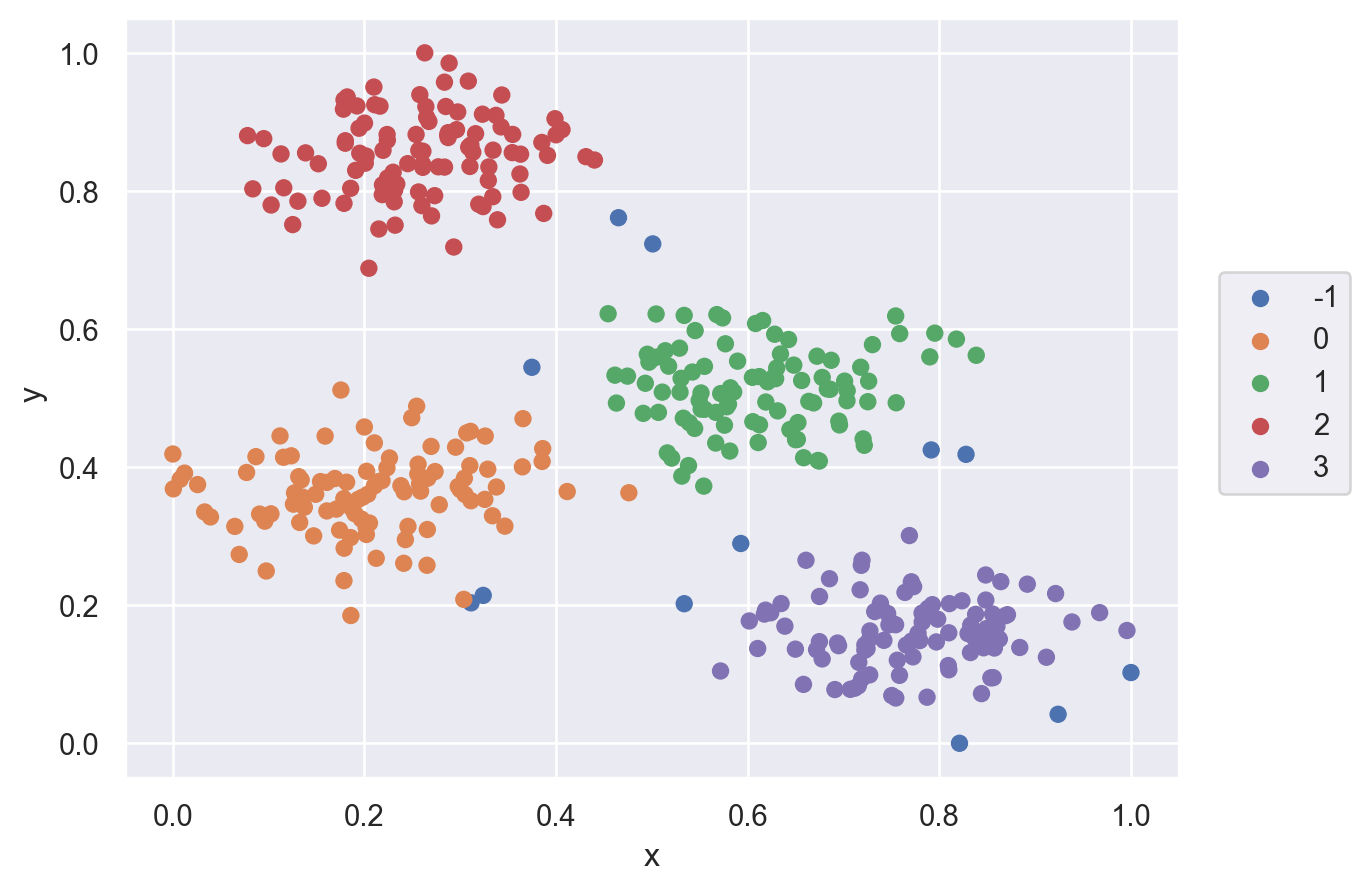

In [305]:
(
    so.Plot(data = data, x="x", y=" y", color = etiqueta.astype(str))
    .add(so.Dot())
)

**Ej6**

6. Implementar un clasificador de k-NN que prediga el sexo de los ping¨uinos utilizando como
variables a el largo del pico y el largo de la aleta. Hacerlo para diferentes valores de k (impares)
y evaluar el error de predicci´on en cada caso. ¿C´omo elegir´ıa el valor de k ´optimo?

In [306]:
# Utilizamos NearestNeighbors para obtener los vecinos más cercanos
from sklearn.neighbors import NearestNeighbors

In [308]:
# Eliminamos datos faltantes y reseteamos los índices, para no tener problemas al graficar
penguins = sns.load_dataset("penguins").dropna().reset_index(drop=True)

In [315]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.254545,18.7,0.152542,3750.0,Male
1,Adelie,Torgersen,0.269091,17.4,0.237288,3800.0,Female
2,Adelie,Torgersen,0.298182,18.0,0.389831,3250.0,Female
3,Adelie,Torgersen,0.167273,19.3,0.355932,3450.0,Female
4,Adelie,Torgersen,0.261818,20.6,0.305085,3650.0,Male


In [316]:
datos = penguins[["bill_length_mm", "flipper_length_mm"]]

In [317]:
# Veamos primero los 9 vecinos más cercanos del pingüino 151
K = 9
pin = 151
neighbors = NearestNeighbors(n_neighbors=K+1)  # Esta función nos devuelve los más cercanos incluyendo a si mismo, por eso tomamos 10.
neighbors.fit(datos)  # En el ajuste solamente almacenamos los datos

# Ahora podemos buscar los vecinos más cercanos a un punto cualquiera o un conjunto de puntos.
# Tenemos que pasarle un DataFrame
distances, indices = neighbors.kneighbors(datos.iloc[[pin]])

In [318]:
distances

array([[0.        , 0.02762801, 0.03561044, 0.05243181, 0.05400039,
        0.0585811 , 0.06933939, 0.07377439, 0.0745699 , 0.07467617]])

# VER BIEN MAÑANA (ver las slides de la clase de k-nn)
# el siguiente código es de chatgpt

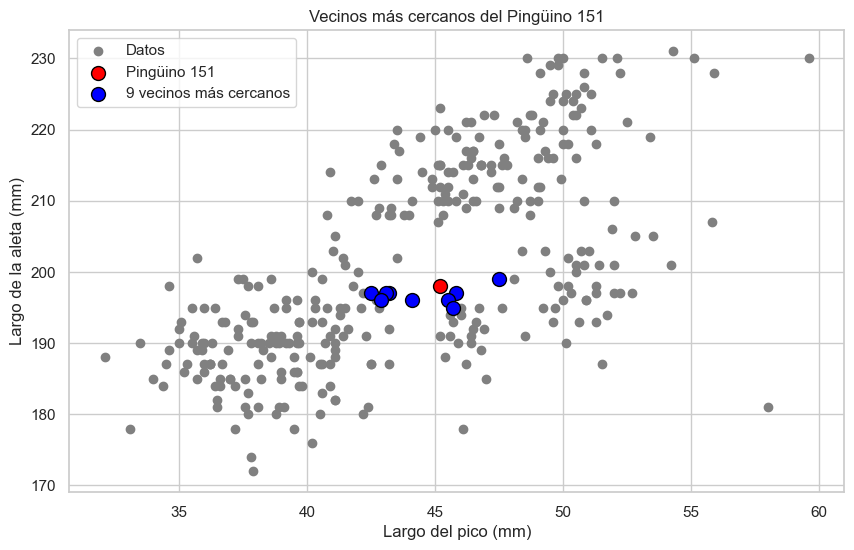

In [322]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset de pingüinos
df = sns.load_dataset('penguins')

# Seleccionar las columnas de interés
df = df[['bill_length_mm', 'flipper_length_mm', 'sex']]

# Eliminar filas con valores faltantes
df = df.dropna()

# Codificar la variable objetivo (sexo)
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

# Seleccionar las características
X = df[['bill_length_mm', 'flipper_length_mm']]

# Configurar NearestNeighbors
K = 9
pin = 151
neighbors = NearestNeighbors(n_neighbors=K+1)  # +1 para incluir al propio punto
neighbors.fit(X)  # Ajustar el modelo con los datos

# Encontrar los vecinos más cercanos al punto 151
distances, indices = neighbors.kneighbors(X.iloc[[pin]])

# Graficar todos los puntos
plt.figure(figsize=(10, 6))
plt.scatter(X['bill_length_mm'], X['flipper_length_mm'], c='gray', label='Datos')

# Resaltar el punto de interés
plt.scatter(X.iloc[pin]['bill_length_mm'], X.iloc[pin]['flipper_length_mm'], c='red', label='Pingüino 151', edgecolors='black', s=100)

# Resaltar los vecinos más cercanos
plt.scatter(X.iloc[indices[0][1:]]['bill_length_mm'], X.iloc[indices[0][1:]]['flipper_length_mm'], c='blue', label=f'{K} vecinos más cercanos', edgecolors='black', s=100)

# Etiquetas y título
plt.xlabel('Largo del pico (mm)')
plt.ylabel('Largo de la aleta (mm)')
plt.title('Vecinos más cercanos del Pingüino 151')
plt.legend()
plt.grid(True)
plt.show()


**6.** Implementar un clasificador de k-NN que prediga el sexo de los ping¨uinos utilizando como
variables a el largo del pico y el largo de la aleta. Hacerlo para diferentes valores de k (impares)
y evaluar el error de predicci´on en cada caso. ¿C´omo elegir´ıa el valor de k ´optimo?

In [13]:
# Eliminamos datos faltantes y reseteamos los índices, para no tener problemas al graficar
penguins = sns.load_dataset("penguins").dropna().reset_index(drop=True)

In [25]:
pin = 100
K = 9
categorias = penguins["sex"]
datos = penguins[["bill_length_mm", "flipper_length_mm"]]

def mas_votado(datos, categorias, k, ind):
    neighbors = NearestNeighbors(n_neighbors=K)
    neighbors.fit(datos.drop([ind]))
    distances, indices = neighbors.kneighbors(datos.iloc[[ind]])
    votos = categorias[indices.flatten()]
    return mode(votos)

In [26]:
mas_votado(datos, categorias, K, pin)

'Female'

In [72]:
x_sin_escalar = penguins[["bill_length_mm", "flipper_length_mm"]]
X = MinMaxScaler().set_output(transform="pandas").fit_transform(x_sin_escalar)
y = penguins["sex"]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [74]:
# para ver el error de predicción
# Repetimos todo para varios valores de K
def error_prediccion(X_train, X_test, y_train, y_test):
    errors = []
    for K in range(1,30,2):
        neighbor = KNeighborsClassifier(n_neighbors=K)
        neighbor.fit(X_train,y_train)
        y_pred = neighbor.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        error = 1 - accuracy
        errors.append(error)
        print(f'K={K}, Error de predicción: {error:.4f}')
    return errors

# según lo que vemos, el K óptimo sería 

In [75]:
errors = error_prediccion(X_train, X_test, y_train, y_test)

K=1, Error de predicción: 0.2388
K=3, Error de predicción: 0.2537
K=5, Error de predicción: 0.2388
K=7, Error de predicción: 0.2239
K=9, Error de predicción: 0.2239
K=11, Error de predicción: 0.2388
K=13, Error de predicción: 0.2388
K=15, Error de predicción: 0.2388
K=17, Error de predicción: 0.2090
K=19, Error de predicción: 0.2388
K=21, Error de predicción: 0.2537
K=23, Error de predicción: 0.2239
K=25, Error de predicción: 0.2239
K=27, Error de predicción: 0.1940
K=29, Error de predicción: 0.1940


In [76]:
# Para elegir el K óptimo
K_values = np.array(range(1, 30, 2))
K_optimo_index = np.argmin(errors)
K_optimo = K_values[K_optimo_index]
K_optimo

27

**7.** Implementar un clasificador de k-NN que prediga la especie de los pingüinos. Pueden elegir las 
variables. ¿Con cáales variables obtienen mejores resultados 
Reportar los resultados con visualizaciones adecuada.

In [78]:
X = penguins[["bill_length_mm", "bill_depth_mm"]]
y = penguins["species"]

In [82]:
datos = penguins[["bill_length_mm", "bill_depth_mm"]]
categorias = penguins["species"]
X = MinMaxScaler().set_output(transform="pandas").fit_transform(X)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
def mas_votado(datos, categorias, k, ind):
    neighbors = NearestNeighbors(n_neighbors=K)
    neighbors.fit(datos.drop([ind]))
    distancias, indices = neighbors.kneighbors(datos.iloc[[ind]])
    votos = categorias[indices.flatten()]
    return (mode(votos))

In [85]:
mas_votado(datos, categorias, 5, 99)

'Adelie'

In [91]:
def error_prediccion(a, b, c, d):
    errors = []
    for K in range(1,30,2):
        neighbor = KNeighborsClassifier(n_neighbors=K)
        neighbor.fit(a,c)
        y_pred = neighbor.predict(b)
        accuracy = accuracy_score(d, y_pred)
        error = 1 - accuracy
        errors.append(error)
        print(f'K={K}, Error de predicción: {error:.4f}')
    return errors

In [92]:
errors = error_prediccion(X_train, X_test, y_train, y_test)

K=1, Error de predicción: 0.0448
K=3, Error de predicción: 0.0597
K=5, Error de predicción: 0.0597
K=7, Error de predicción: 0.0299
K=9, Error de predicción: 0.0149
K=11, Error de predicción: 0.0149
K=13, Error de predicción: 0.0149
K=15, Error de predicción: 0.0149
K=17, Error de predicción: 0.0149
K=19, Error de predicción: 0.0000
K=21, Error de predicción: 0.0149
K=23, Error de predicción: 0.0149
K=25, Error de predicción: 0.0149
K=27, Error de predicción: 0.0149
K=29, Error de predicción: 0.0299


In [94]:
k_valores = np.array(range(1,30,2))
K_optimo_index = np.argmin(errors)
K_optimo = k_valores[K_optimo_index]
K_optimo

19

In [98]:
def predicciones(a,b,c,d):
    for K in range(1,30,2):
        neighbor = KNeighborsClassifier(n_neighbors=K)
        neighbor.fit(a,c)
        y_pred = neighbor.predict(b)
    return y_pred

# Pregunta: me da que el K óptimo es el 19, que tiene un error de predicción 0. ¿Está sobreajustado el modelo? ¿Qué está pasando?

# ¿Cómo hacer la parte de visualización?